In [131]:
import random
import numpy as np 
import matplotlib.pyplot as plt
import seaborn

In [132]:
rand = np.random.RandomState(42)

In [133]:
X = rand.randint(0, 10, (4, 6))
print(X)



[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [134]:
X = rand.rand(10, 2)
X.shape



(10, 2)

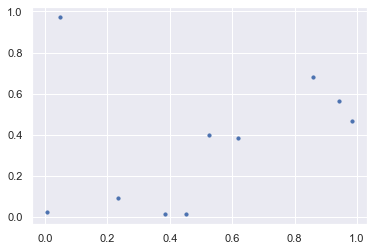

In [135]:
seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=10)

In [136]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)


In [137]:
X[:, np.newaxis, :]
print(X)
X[np.newaxis, :, :]
print(X)
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape
sq_differences = differences ** 2
sq_differences.shape
#print(sq_differences)
dist_sq = sq_differences.sum(-1)
dist_sq.shape
dist_sq.diagonal()
#print(dist_sq)
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]]
[[0.00706631 0.02306243]
 [0.52477466 0.39986097]
 [0.04666566 0.97375552]
 [0.23277134 0.09060643]
 [0.61838601 0.38246199]
 [0.98323089 0.46676289]
 [0.85994041 0.68030754]
 [0.45049925 0.01326496]
 [0.94220176 0.56328822]
 [0.3854165  0.01596625]]
[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


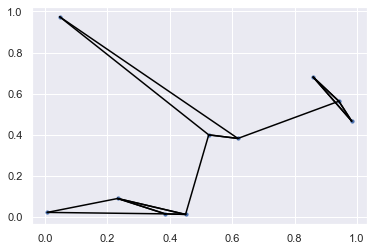

In [138]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
plt.scatter(X[:, 0], X[:, 1], s=10)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')